In [ ]:
!pip install gymnasium

In [ ]:
from google.colab import drive
from pytz import timezone
import os
from datetime import datetime
from utils import (create_exp_dirs,
                   save_exp_params,
                   create_environment,
                   train_agent,
                   load_best_agent_for_train_step,
                   evaluate_agent,
                   get_validation_metrics,
                   display_validation_plot)
from agent import QAgent, DynaQAgent
from envmodel import StochasticEnvModel

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
TZ = timezone('Europe/Moscow')

env_dir = '/content/drive/MyDrive/ML/Reinforcement Learning/Frozen Lake'
scenarios_dir = os.path.join(env_dir, 'scenarios')

In [ ]:
if not os.path.exists(scenarios_dir):
    os.makedirs(scenarios_dir)

In [ ]:
MAP_SIZE = 8
STOCHASTIC_ENV = True

In [ ]:
NUM_EXPERIMENTS = 5

for i in range(NUM_EXPERIMENTS):

    exp_params = {
        'scenario_name': f'{MAP_SIZE}x{MAP_SIZE}_{"stochastic" if STOCHASTIC_ENV else "deterministic"}',
        'algorithm_name': 'dynaq',
        'exp_id': f'exp-{datetime.now(TZ).strftime("%d%m-%H%M%S")}',
        'seed': 21,
        'training': {
            'episode_count': 5000,
            'learning_rate': 0.05,
            'gamma': 0.99,
            'epsilon': 1.0,
            'epsilon_min': 0.01,
            'epsilon_decay_rate': 0.9999,
            'planning_steps': 30
        },
        'validation': {
            'validate_agent_every_n_eps': 100,
            'episode_count': 10
        },
        'evaluation': {
            'episode_count': 10
        }
    }

    exp_dirs = create_exp_dirs(scenarios_dir, exp_params)
    save_exp_params(exp_params, exp_dirs['exp'])

    env = create_environment(map_size=MAP_SIZE, stochastic_env=STOCHASTIC_ENV)

    print(f'TRAINING Dyna-Q agent, EXPERIMENT {i+1}\n')
    dynaq_agent = DynaQAgent(env, StochasticEnvModel, exp_params)
    train_agent(env, dynaq_agent, exp_params, exp_dirs, enable_eps_recording=False)

env.close()

TRAINING Dyna-Q agent, EXPERIMENT 1

EPISODE # 100 / 5000
Win share (10 eps): 0.2
Avg step count (10 eps): 53.9
Agent exploration level (epsilon): 0.99
--------------------------------------------------
EPISODE # 200 / 5000
Win share (10 eps): 0.1
Avg step count (10 eps): 46.7
Agent exploration level (epsilon): 0.98
--------------------------------------------------
EPISODE # 300 / 5000
Win share (10 eps): 0.7
Avg step count (10 eps): 48.2
Agent exploration level (epsilon): 0.97
--------------------------------------------------
EPISODE # 400 / 5000
Win share (10 eps): 0.4
Avg step count (10 eps): 48.7
Agent exploration level (epsilon): 0.961
--------------------------------------------------
EPISODE # 500 / 5000
Win share (10 eps): 0.3
Avg step count (10 eps): 75.2
Agent exploration level (epsilon): 0.951
--------------------------------------------------
EPISODE # 600 / 5000
Win share (10 eps): 0.3
Avg step count (10 eps): 63.7
Agent exploration level (epsilon): 0.942
---------------

In [ ]:
# load the best agent from the last experiment

ts = 4800

load_best_agent_for_train_step(ts,
                               exp_dirs['training'],
                               dynaq_agent)

Win share:  0.7
Avg step count:  75.0


In [ ]:
# evaluate and record videos using the loaded agent

env = create_environment(map_size=MAP_SIZE, stochastic_env=STOCHASTIC_ENV)
evaluate_agent(env, dynaq_agent, exp_params, exp_dirs)
env.close()

EPISODE # 1
Agent reached the Goal 🏆
Number of steps: 48
--------------------------------------------------
EPISODE # 2
Agent was defeated ☠️
Number of steps: 86
--------------------------------------------------
EPISODE # 3
Agent was defeated ☠️
Number of steps: 100
--------------------------------------------------
EPISODE # 4
Agent reached the Goal 🏆
Number of steps: 89
--------------------------------------------------
EPISODE # 5
Agent reached the Goal 🏆
Number of steps: 49
--------------------------------------------------
EPISODE # 6
Agent was defeated ☠️
Number of steps: 100
--------------------------------------------------
EPISODE # 7
Agent reached the Goal 🏆
Number of steps: 42
--------------------------------------------------
EPISODE # 8
Agent reached the Goal 🏆
Number of steps: 81
--------------------------------------------------
EPISODE # 9
Agent reached the Goal 🏆
Number of steps: 57
--------------------------------------------------
EPISODE # 10
Agent reached the Goal

In [ ]:
dynaq_metrics = []

for exp in os.listdir(os.path.join(scenarios_dir, '8x8_stochastic/dynaq')):
    dynaq_metrics.append(get_validation_metrics(scenarios_dir, '8x8_stochastic/dynaq', exp))

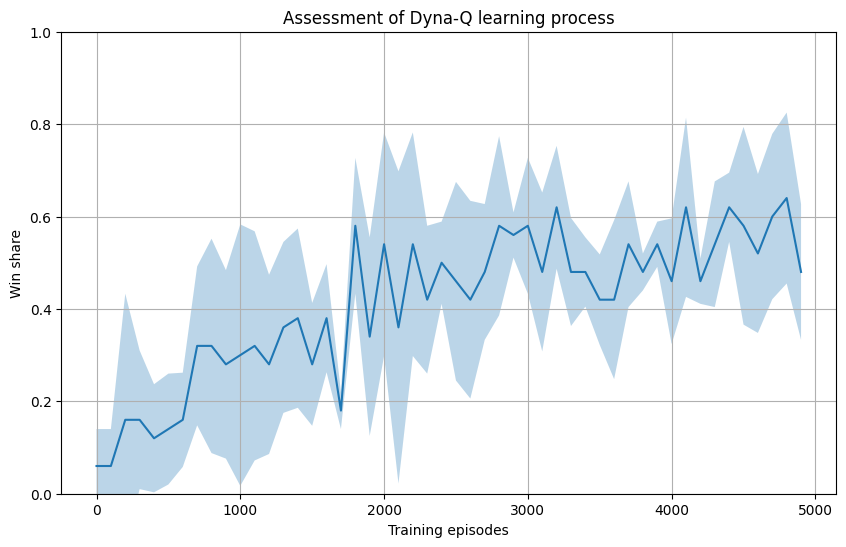

In [ ]:
display_validation_plot(dynaq_metrics,
                        exp_params['validation']['validate_agent_every_n_eps'],
                        exp_params['training']['episode_count'],
                        'Dyna-Q')

# Compare against the simple Q-agent

In [ ]:
MAP_SIZE = 8
STOCHASTIC_ENV = True

In [ ]:
NUM_EXPERIMENTS = 5

for i in range(NUM_EXPERIMENTS):

    exp_params = {
        'scenario_name': f'{MAP_SIZE}x{MAP_SIZE}_{"stochastic" if STOCHASTIC_ENV else "deterministic"}',
        'algorithm_name': 'qtable',
        'exp_id': f'exp-{datetime.now(TZ).strftime("%d%m-%H%M%S")}',
        'seed': 21,
        'training': {
            'episode_count': 5000,
            'learning_rate': 0.05,
            'gamma': 0.99,
            'epsilon': 1.0,
            'epsilon_min': 0.01,
            'epsilon_decay_rate': 0.99995
        },
        'validation': {
            'validate_agent_every_n_eps': 100,
            'episode_count': 10
        },
        'evaluation': {
            'episode_count': 10
        }
    }

    exp_dirs = create_exp_dirs(scenarios_dir, exp_params)
    save_exp_params(exp_params, exp_dirs['exp'])

    env = create_environment(map_size=MAP_SIZE, stochastic_env=STOCHASTIC_ENV)

    print(f'TRAINING Q-agent, EXPERIMENT {i+1}\n')
    qtable_agent = QAgent(env, exp_params)
    train_agent(env, qtable_agent, exp_params, exp_dirs, enable_eps_recording=False)

env.close()

TRAINING Q-agent, EXPERIMENT 1

EPISODE # 100 / 5000
Win share (10 eps): 0.0
Avg step count (10 eps): 100.0
Agent exploration level (epsilon): 0.995
--------------------------------------------------
EPISODE # 200 / 5000
Win share (10 eps): 0.0
Avg step count (10 eps): 100.0
Agent exploration level (epsilon): 0.99
--------------------------------------------------
EPISODE # 300 / 5000
Win share (10 eps): 0.0
Avg step count (10 eps): 100.0
Agent exploration level (epsilon): 0.985
--------------------------------------------------
EPISODE # 400 / 5000
Win share (10 eps): 0.0
Avg step count (10 eps): 100.0
Agent exploration level (epsilon): 0.98
--------------------------------------------------
EPISODE # 500 / 5000
Win share (10 eps): 0.0
Avg step count (10 eps): 100.0
Agent exploration level (epsilon): 0.975
--------------------------------------------------
EPISODE # 600 / 5000
Win share (10 eps): 0.0
Avg step count (10 eps): 100.0
Agent exploration level (epsilon): 0.97
--------------

In [ ]:
# load the best agent from the last experiment

ts = 4900

load_best_agent_for_train_step(ts,
                               exp_dirs['training'],
                               qtable_agent)

Win share:  0.6
Avg step count:  68.5


In [ ]:
# evaluate and record videos using the loaded agent

env = create_environment(map_size=MAP_SIZE, stochastic_env=STOCHASTIC_ENV)
evaluate_agent(env, qtable_agent, exp_params, exp_dirs)
env.close()

EPISODE # 1
Agent was defeated ☠️
Number of steps: 30
--------------------------------------------------
EPISODE # 2
Agent reached the Goal 🏆
Number of steps: 59
--------------------------------------------------
EPISODE # 3
Agent reached the Goal 🏆
Number of steps: 26
--------------------------------------------------
EPISODE # 4
Agent reached the Goal 🏆
Number of steps: 60
--------------------------------------------------
EPISODE # 5
Agent was defeated ☠️
Number of steps: 100
--------------------------------------------------
EPISODE # 6
Agent reached the Goal 🏆
Number of steps: 98
--------------------------------------------------
EPISODE # 7
Agent reached the Goal 🏆
Number of steps: 84
--------------------------------------------------
EPISODE # 8
Agent was defeated ☠️
Number of steps: 27
--------------------------------------------------
EPISODE # 9
Agent was defeated ☠️
Number of steps: 100
--------------------------------------------------
EPISODE # 10
Agent reached the Goal 🏆


In [ ]:
qtable_metrics = []

for exp in os.listdir(os.path.join(scenarios_dir, '8x8_stochastic/qtable')):
    qtable_metrics.append(get_validation_metrics(scenarios_dir, '8x8_stochastic/qtable', exp))

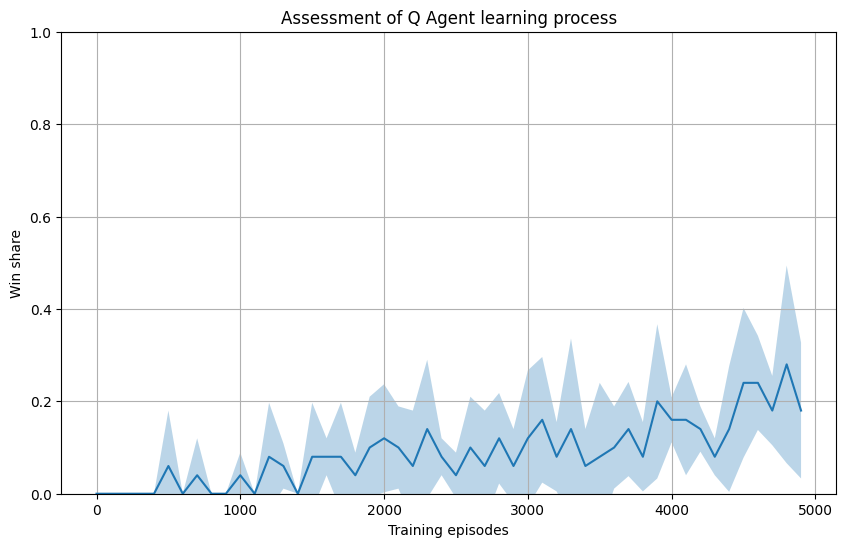

In [ ]:
display_validation_plot(qtable_metrics,
                        exp_params['validation']['validate_agent_every_n_eps'],
                        exp_params['training']['episode_count'],
                        'Q Agent')